In [235]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [236]:
df = pd.read_csv("tenis.csv")
class_names = list(np.unique(df.values[:,4]))
print(class_names)
df

['No', 'Yes']


,Outlook,temperature,humidity,wind,playtennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [237]:
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)
df

,Outlook,temperature,humidity,wind,playtennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [238]:
data = df.values[:,:4]
data_columns = list(df.columns.values[:4])

In [239]:
target=df.values[:,4]

In [240]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=1)

In [241]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=1)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

## Métrica y Matriz de Confusión

Accuracy: 0.6


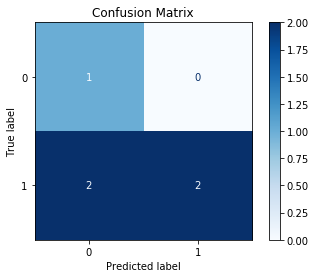

In [242]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
disp = metrics.plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')
plt.show()

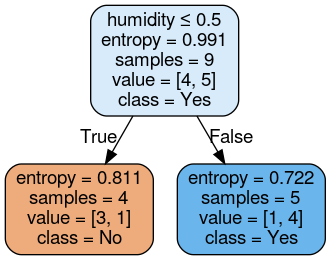

In [243]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data_columns,class_names=class_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('iris.png')
Image(graph.create_png())

Se observa que cuando el algoritmo selecciona la humedad logra un Accuracy de 0.6, mientras que cuando selecciona al viento no supera 4.0, por lo que se puede considerar que un partido puede ser mejor cuando hay humedad por sobre cuando corre viento, lo cuál tiene lógica por el efecto causado en la pelota.